In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import random
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [26]:
import data_prep
import ngram
import linguistic_feature

In [27]:
df = data_prep.import_chi_review()
print(len(df))
display(df[:5])

1600


,Label,Rating,Ori_Review
0,1,1,Affinia Chicago is one of the worst hotels I h...
1,1,1,I recently stayed at the Affina Chicago hotel ...
2,1,1,I stayed at the Affina Chicago for my annivers...
3,1,1,If you are looking for a high end hotel on the...
4,1,1,I just returned from a long weekend in Chicago...


In [28]:
df = data_prep.preprocess_ngram(df)
df = data_prep.preprocess_ling_feature(df)
df = linguistic_feature.ling_feature(df)
df.head()

,Label,Rating,Ori_Review,Clean_Review,PP_Review,Word_List,Word_List_all,num_word,num_coreword,num_stopword,num_char,char_per_word,num_first_sing,num_first_pru,num_third
0,1,1,Affinia Chicago is one of the worst hotels I h...,affinia chicago be one of the bad hotel i have...,affinia one bad ever life treat poorly guest f...,"[affinia, one, bad, ever, life, treat, poorly,...","[affinia, chicago, be, one, of, the, bad, hote...",166,56,110,845,5.090361,15,0,2
1,1,1,I recently stayed at the Affina Chicago hotel ...,i recently stay at the affina chicago hotel an...,recently affina really dissappointed arrive de...,"[recently, affina, really, dissappointed, arri...","[i, recently, stay, at, the, affina, chicago, ...",224,94,130,1168,5.214286,19,0,1
2,1,1,I stayed at the Affina Chicago for my annivers...,i stay at the affina chicago for my anniversar...,affina anniversary great location make poor cu...,"[affina, anniversary, great, location, make, p...","[i, stay, at, the, affina, chicago, for, my, a...",69,29,40,373,5.405797,4,0,0
3,1,1,If you are looking for a high end hotel on the...,if you be look for a high end hotel on the mag...,look high end magnificent mile affinia best op...,"[look, high, end, magnificent, mile, affinia, ...","[if, you, be, look, for, a, high, end, hotel, ...",146,55,91,768,5.260274,0,0,1
4,1,1,I just returned from a long weekend in Chicago...,i just return from a long weekend in chicago w...,return long weekend wife affinia cannot even b...,"[return, long, weekend, wife, affinia, cannot,...","[i, just, return, from, a, long, weekend, in, ...",253,101,152,1278,5.051383,9,15,0


## Sample Reviews

#### Deceptive

In [29]:
for txt in df[df['Label'] == 1]['Ori_Review'].sample(3):
    print(txt)
    print()

Terrible experience, I will not stay here again. The walls were so thin that I was kept up all night by the party going on in the suite next to mine. I talked to the management several times, but nothing was done. It may just be the people that I had contact with, but I thought the staff was standoffish and rude. Very unpleasant experience, especially given the cost of staying here!

I went to the Homewood Suites in Chicago which is part of Hilton's famous hotels. I gotta say that this is the worst hotel that I have ever been to. In fact, Homewood Suites is the worst hotel on the face of this planet. I checked out the rooms and their rooms look like the hotel was built in bad shape. In fact, the rooms looked so bad that I wanted to leave the hotel early. I also got to check out the employees who worked for this hotel. I saw one of the employees and when I rung the bell for my room, they ignored me. How could a hotel have the worst service when they are supposed to not ignore you? One m

#### Truthful

In [30]:
for txt in df[df['Label'] == -1]['Ori_Review'].sample(3):
    print(txt)
    print()

We connected to Affinia Chicago thorugh a city websight. The deal was fair for a downtown hotel on the main drag with an attractiion included. There was information out there that the hotel was being overhauled although we did not pay much attention to that. They are currently under major construction. They will be a little late of their projections in the finish date. I must say that the staff tried very hard to make our stay comfortable under very difficult circumstances. The room was complete and was good. It had a very nice bathroom. The main lobbie and all hotel amenities are totally unfinished drywall with no food, drink, or rest room opportunities. The construction guys did their best to limit activity and noise to after 9:00am. I think this will be a good one once they are done. As of the end of May, they have a way yet to go.

After reading all the lukewarm reviews for this hotel, I went ahead and got an Ambassador membership just to hedge off any unpleasantness. I normally ha

## Explore Data Distribution

#### Review length distribution (by charactors and words)

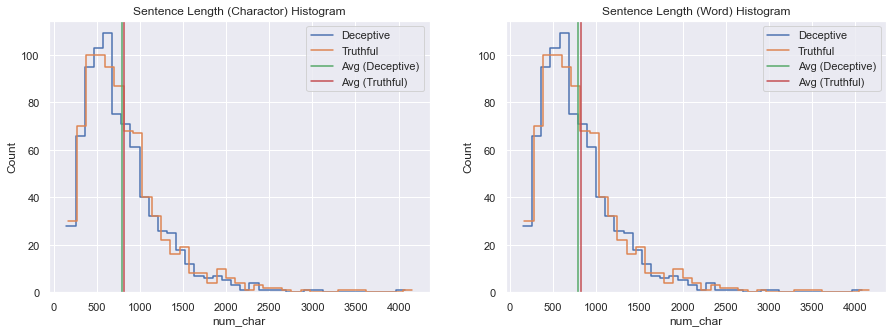

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_char_dec = df[df['Label'] == 1]['num_char']
num_char_tru = df[df['Label'] == -1]['num_char']
num_word_dec = df[df['Label'] == 1]['num_char']
num_word_tru = df[df['Label'] == -1]['num_char']

sns.histplot(num_char_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_char_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_char_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_char_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Sentence Length (Charactor) Histogram')
ax1.legend()

sns.histplot(num_word_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_word_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_word_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_word_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Sentence Length (Word) Histogram')
ax2.legend()

plt.show()

#### Core word and stop word distribution

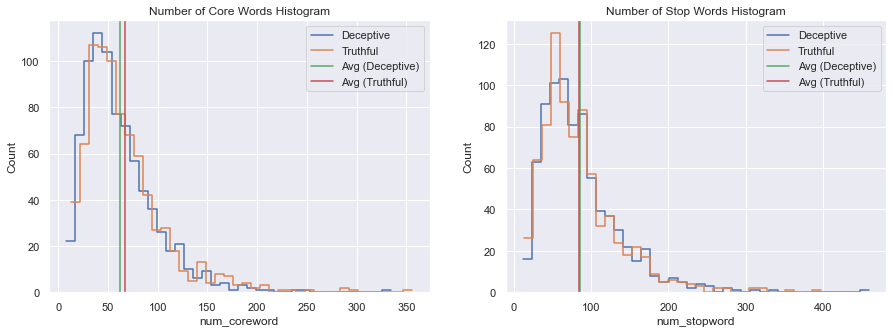

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_core_dec = df[df['Label'] == 1]['num_coreword']
num_core_tru = df[df['Label'] == -1]['num_coreword']
num_stop_dec = df[df['Label'] == 1]['num_stopword']
num_stop_tru = df[df['Label'] == -1]['num_stopword']

sns.histplot(num_core_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_core_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_core_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_core_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('Number of Core Words Histogram')
ax1.legend()

sns.histplot(num_stop_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_stop_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_stop_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_stop_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('Number of Stop Words Histogram')
ax2.legend()

plt.show()

#### Pronoun Distribution

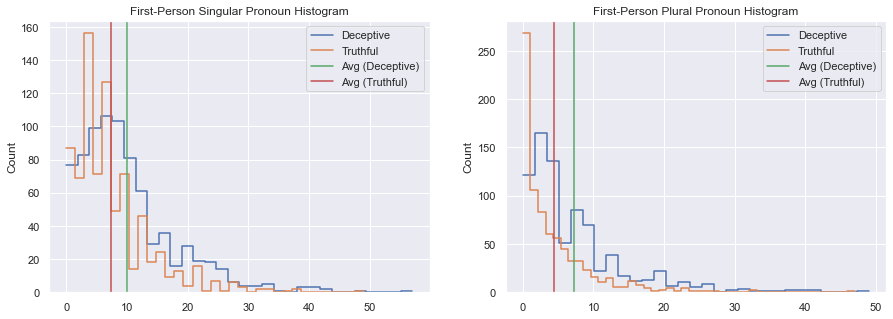

<Figure size 432x288 with 0 Axes>

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

num_fs_dec = df[df['Label'] == 1]['num_first_sing']
num_fs_tru = df[df['Label'] == -1]['num_first_sing']
num_fp_dec = df[df['Label'] == 1]['num_first_pru']
num_fp_tru = df[df['Label'] == -1]['num_first_pru']
num_third_dec = df[df['Label'] == 1]['num_third']
num_third_tru = df[df['Label'] == -1]['num_third']

sns.histplot(num_f_dec, ax=ax1, element="step", fill=False, label='Deceptive')
sns.histplot(num_f_tru, ax=ax1, element="step", fill=False, label='Truthful')
ax1.axvline(x=num_f_dec.mean(), label='Avg (Deceptive)', c='g')
ax1.axvline(x=num_f_tru.mean(), label='Avg (Truthful)', c='r')
ax1.set_title('First-Person Singular Pronoun Histogram')
ax1.set(xlabel='')
ax1.legend()

sns.histplot(num_fs_dec, ax=ax2, element="step", fill=False, label='Deceptive')
sns.histplot(num_fs_tru, ax=ax2, element="step", fill=False, label='Truthful')
ax2.axvline(x=num_fs_dec.mean(), label='Avg (Deceptive)', c='g')
ax2.axvline(x=num_fs_tru.mean(), label='Avg (Truthful)', c='r')
ax2.set_title('First-Person Plural Pronoun Histogram')
ax2.set(xlabel='')
ax2.legend()

plt.show()
plt.savefig('first_person_pronoun.svg')